# One dimensional optimization

## Fibonacci method

### Idea

Делим интервал $[a_k, b_k]$ следующим образом:

Считаем 

$\lambda_k = a_k + \frac{F_{n-k-1}}{F_{n-k+1}}(b_k - a_k)$

$\mu_k = a_k + \frac{F_{n-k}}{F_{n-k+1}}(b_k - a_k)$

Далее если $f(\lambda_k) > f(\mu_k)$, то $[a_{k+1}, b_{k+1}] = [\lambda_k, b_k]$, иначе $[a_k, \mu_k]$



In [28]:
# from colab
! wget https://raw.githubusercontent.com/Egor200313/optimization/master/one_dim/optimizer.py -nc

--2022-11-13 14:48:13--  https://raw.githubusercontent.com/Egor200313/optimization/master/one_dim/optimizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2084 (2.0K) [text/plain]
Saving to: ‘optimizer.py’

optimizer.py        100%[===================>]   2.04K  --.-KB/s    in 0s      

2022-11-13 14:48:13 (17.3 MB/s) - ‘optimizer.py’ saved [2084/2084]



In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from optimizer import optimize_one_dim

def f(x):
  return (x - 4.0)**2 + 2.0


## Зависимость времени от точности

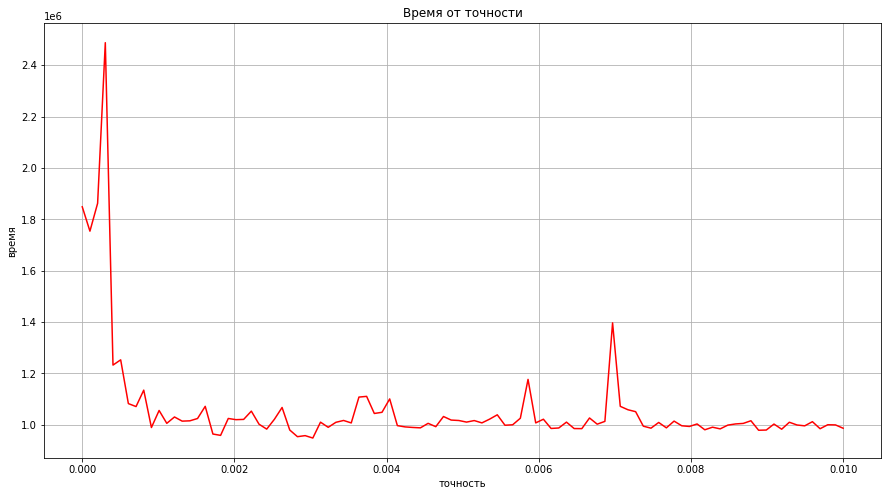

In [76]:
import time
iters = 1000
delay = []
tolerance = np.linspace(0.000000001, 0.01, 100)
for tol in tolerance:
  start = time.time_ns()
  result = optimize_one_dim(0.0, 100000.0, tol, iters, f)
  end = time.time_ns()
  delay.append(end - start)

plt.figure(figsize=(15,8))
plt.title("Время от точности")
plt.plot(tolerance, delay, c='red')
plt.xlabel("точность")
plt.ylabel("время")
plt.grid()
plt.show()


## Зависимость количества итераций от точности

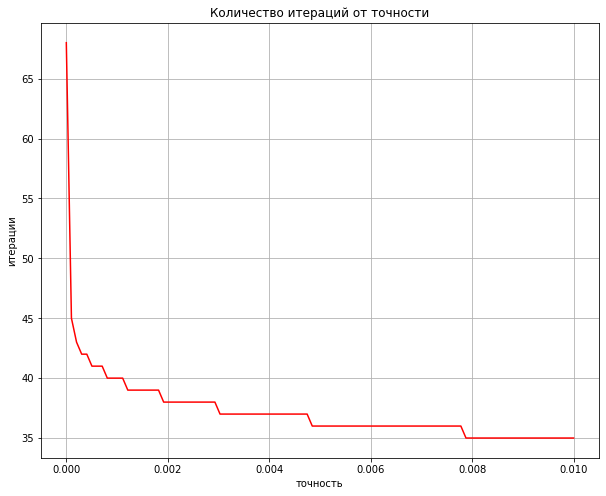

In [60]:
iters_res = []
for tol in tolerance:
  result = optimize_one_dim(0.0, 100000.0, tol, iters, f)
  iters_res.append(result['iterations'])

plt.figure(figsize=(10,8))
plt.title("Количество итераций от точности")
plt.plot(tolerance, iters_res, c='red')
plt.xlabel("точность")
plt.ylabel("итерации")
plt.grid()
plt.show()

## Зависимость количества вычислений функции от точности

Так как на каждой итерации функция вычисляется ровно два раза то зависимость будет такая же как на предыдущем графике

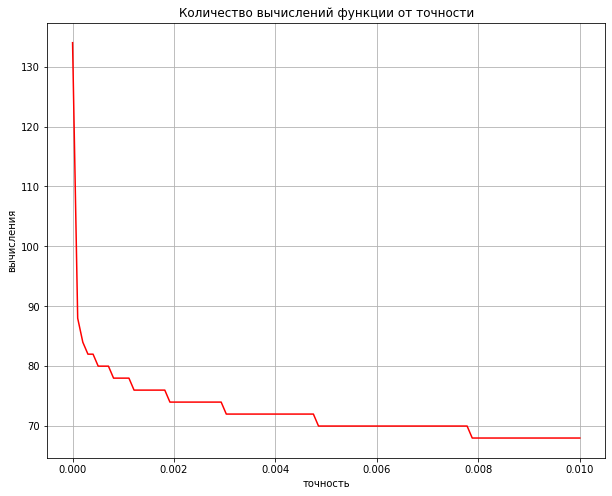

In [61]:
comps = []
for tol in tolerance:
  result = optimize_one_dim(0.0, 100000.0, tol, iters, f)
  comps.append(result['comp'])

plt.figure(figsize=(10,8))
plt.title("Количество вычислений функции от точности")
plt.plot(tolerance, comps, c='red')
plt.xlabel("точность")
plt.ylabel("вычисления")
plt.grid()
plt.show()